In [1]:
import pandas as pd
fit_B = pd.read_csv("data/refer_B.csv")
fit_V = pd.read_csv("data/refer_V.csv")

In [2]:
merge = pd.merge(fit_B, fit_V, on=['StarTag',"RA","DEC","raw_x","raw_y","Bmag","Vmag"], suffixes=('_B', '_V'))

In [3]:
merge

,Unnamed: 0_B,StarTag,RA,DEC,raw_x,raw_y,Bmag,Vmag,Unnamed: 0.1_B,id_B,...,xcentroid_V,ycentroid_V,sharpness_V,roundness1_V,roundness2_V,npix_V,sky_V,peak_V,flux_V,mag_V
0,894,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.000,9.800,894,895,...,2110.639166,1929.390303,0.375628,-0.021937,-0.020276,25,0.0,44758.931226,61.179057,-4.466507
1,1523,LeftBottom,13:42:43.7230,28:15:53.329,879.56,817.40,12.857,12.772,283,284,...,877.860102,817.273622,0.407605,-0.028799,0.024847,25,0.0,3114.325626,4.431437,-1.616362
2,2642,RightBottom,13:41:35.465,28:12:11.848,2345.84,460.32,12.147,11.501,162,163,...,2345.514747,459.378079,0.373416,-0.094632,-0.231750,25,0.0,10024.730707,15.129854,-2.949587
3,4750,LeftTop,13:42:28.5595,28:31:58.361,1198.76,2383.96,11.000,10.400,1030,1031,...,1197.206875,2383.826130,0.393408,-0.053235,-0.040598,25,0.0,23777.804674,35.159812,-3.865116
4,5430,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.140,22.579,470,471,...,1553.289848,1349.011027,0.369772,0.096134,0.288298,25,0.0,2981.145939,4.247378,-1.570302


In [6]:
merge[merge['starTag']="Center"]['Vmag'] = 13.038
merge[merge['starTag']="Center"]['Bmag'] = 14.285

SyntaxError: invalid syntax (93003533.py, line 1)

In [7]:
merge[merge['starTag']="Center"] 

SyntaxError: invalid syntax (2279701113.py, line 1)

In [1]:
import pandas as pd
merge = pd.read_csv("data/merge.txt")

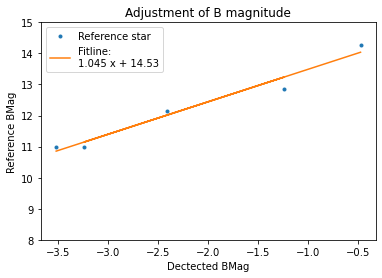

In [2]:
import matplotlib.pyplot as plt
import numpy as np

z = np.polyfit(x=merge["mag_B"], y=merge["Bmag"], deg=1)
p = np.poly1d(z)
line = p(merge["mag_B"])

  
plt.ylim(8,15)
# plotting the points 
plt.plot(merge["mag_B"], merge["Bmag"], '.')
plt.plot(merge["mag_B"], line, '-')
plt.legend(["Reference star",f'Fitline:{p}'])

plt.xlabel('Dectected BMag')
plt.ylabel('Reference BMag')
plt.title('Adjustment of B magnitude')
plt.savefig("fig1")
plt.show()
  
# function to show the plot
plt.show()

In [16]:
p

poly1d([ 1.04546063, 14.53487934])

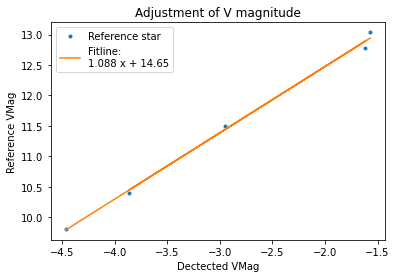

In [3]:
import matplotlib.pyplot as plt
import numpy as np

z = np.polyfit(x=merge["mag_V"], y=merge["Vmag"], deg=1)
p = np.poly1d(z)
line = p(merge["mag_V"])

  
#plt.ylim(8,15)
# plotting the points 
plt.plot(merge["mag_V"], merge["Vmag"], '.')
plt.plot(merge["mag_V"], line, '-')
plt.legend(["Reference star",f'Fitline: {p}'])

plt.xlabel('Dectected VMag')
plt.ylabel('Reference VMag')
plt.title('Adjustment of V magnitude')
plt.savefig("fig2")
plt.show()
  
# function to show the plot
plt.show()

In [19]:
np.mean(merge['Vmag'] - merge['mag_V'])

14.395774767739237

In [79]:
p

poly1d([ 2.94375906, 21.92838694])

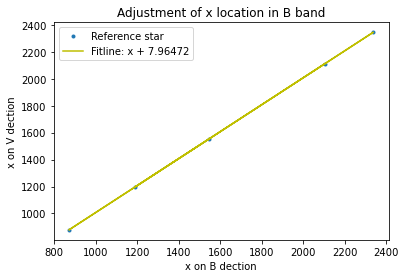

In [4]:
import matplotlib.pyplot as plt
import numpy as np

z = np.polyfit(x=merge["xcentroid_B"], y=merge["xcentroid_V"], deg=1)
p = np.poly1d(z)


plt.plot(merge["xcentroid_B"], merge["xcentroid_V"], '.')
plt.plot(merge["xcentroid_B"], merge["xcentroid_B"] + 7.964721994132151, '-y')


plt.xlabel('x on B dection')
plt.ylabel('x on V dection')

plt.title('Adjustment of x location in B band')
plt.legend(["Reference star","Fitline: x + 7.96472"])
plt.savefig("fig3")

plt.show()
  
# function to show the plot
plt.show()

In [62]:
np.mean(merge["xcentroid_B"] - merge["xcentroid_V"])

-7.964721994132151

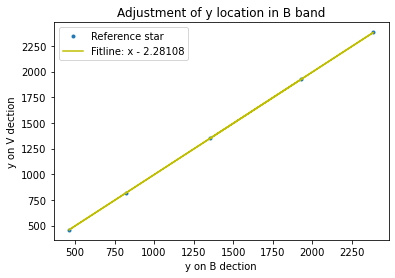

In [5]:
import matplotlib.pyplot as plt
import numpy as np

z = np.polyfit(x=merge["ycentroid_B"], y=merge["ycentroid_V"], deg=1)
p = np.poly1d(z)

plt.plot(merge["ycentroid_B"], merge["ycentroid_V"], '.')
plt.plot(merge["ycentroid_B"], merge["ycentroid_V"] - 2.2810863239019907, '-y')


plt.xlabel('y on B dection')
plt.ylabel('y on V dection')
plt.legend(["Reference star","Fitline: x - 2.28108"])
plt.title('Adjustment of y location in B band')

plt.savefig("fig4")
plt.show()
  
# function to show the plot
plt.show()

In [68]:
np.mean(merge["ycentroid_B"] - merge["ycentroid_V"])

2.2810863239019907

In [20]:
Vtable = pd.read_csv('data/Vtable_Source.csv')
Btable = pd.read_csv('data/Btable_Source.csv')

In [21]:
Btable ["xcentroid"] = Btable["xcentroid"] + 7.964721994132151
Btable ["ycentroid"] = Btable["ycentroid"] - 2.2810863239019907

In [ ]:
#1.04546063, 14.53487934
#1.08803784, 14.65051884

In [22]:
Btable["mag"] = Btable["mag"]* 1.04546063 + 14.53487934
Vtable["mag"] = Vtable["mag"] *1.08803784 + 14.65051884

In [24]:
Vtable

,Unnamed: 0,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
0,0,1,21.002756,0.620500,0.791488,-0.376853,-0.548601,25,0.0,301.633617,1.727666,14.004606
1,1,2,38.241919,0.732045,0.747388,-0.079008,-0.617443,25,0.0,251.389189,1.342446,14.302627
2,2,3,51.013667,0.691893,0.619264,0.223140,-0.300389,25,0.0,235.111266,1.407768,14.246500
3,3,4,218.923702,0.030619,0.238365,0.147541,-0.426111,25,0.0,143.692287,1.119231,14.517453
4,4,5,472.022245,0.264790,0.642032,0.177453,-0.087960,25,0.0,181.694268,1.348260,14.297522
...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1489,1490,2834.968654,3049.287874,0.713262,0.391319,0.251351,25,0.0,148.620473,1.285665,14.353680
1490,1490,1491,3013.091104,3050.212140,0.686435,-0.001924,-0.164120,25,0.0,751.523064,1.171419,14.463615
1491,1491,1492,2990.914565,3051.804628,0.974157,-0.178853,0.062558,25,0.0,180.217582,1.323550,14.319373
1492,1492,1493,513.492487,3053.755440,0.553895,-0.802456,-0.145762,25,0.0,325.002842,2.584973,13.528599


In [25]:
Vtable.to_csv("data/Vtable_adj.csv")
Btable.to_csv("data/Btable_adj.csv")